<a href="https://colab.research.google.com/github/Vignesh-397/Image_Dehazing/blob/main/Testing_Part/Test_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model

In [10]:
vgg = VGG19(include_top=False, weights='imagenet')
vgg.trainable = False
content_layer = 'block2_conv2'
loss_model = Model(vgg.input, vgg.get_layer(content_layer).output)

# Perceptual loss using VGG19
def lossVGG(y_true, y_pred, loss_model):
    vggX = loss_model(y_pred)
    vggY = loss_model(y_true)
    return K.mean(K.square(vggX - vggY))

# Total loss
def my_loss(y_true, y_pred):
    mse = MSE(y_true, y_pred)
    return lossVGG(y_true, y_pred, loss_model) + mse

In [12]:
model = load_model('/content/drive/MyDrive/Samsung Prism/dehazing_model.keras', custom_objects={'my_loss': my_loss})

In [45]:
# Upload the image
from google.colab import files
uploaded = files.upload()

Saving singapore.jpg to singapore.jpg


In [46]:
# Function to load a single test image
def load_test_image(image_path):
    img = cv2.imread(image_path) / 255.0
    img_resized = cv2.resize(img, (256, 256))
    return np.expand_dims(img_resized, axis=0)

# Function to visualize the results
def visualize_results(original, predicted):
    # Convert images from float to uint8
    original_uint8 = (original * 255).astype(np.uint8)
    predicted_uint8 = (predicted * 255).astype(np.uint8)

    plt.figure(figsize=(10, 5))

    # Plot original image
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(original_uint8[0], cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # Plot predicted image
    plt.subplot(1, 2, 2)
    plt.title("Dehazed Image")
    plt.imshow(cv2.cvtColor(predicted_uint8[0], cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()


In [47]:
# Load and preprocess the image
image_filename = list(uploaded.keys())[0]
original_img = load_test_image(image_filename)

In [48]:
# Make a prediction
predicted_img = model.predict(original_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


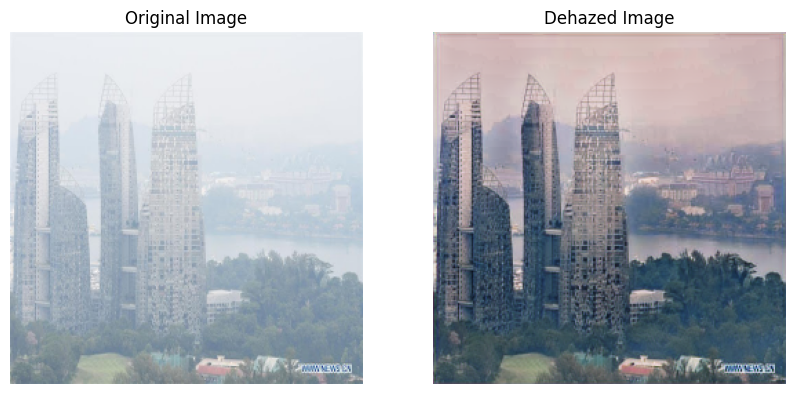

In [49]:
# Visualize the results
visualize_results(original_img, predicted_img)